In [431]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow_addons.metrics import RSquare
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [473]:
df = pd.read_csv('./martijn/martijn-nsrdb.csv')
#df = pd.read_csv('./martijn/martijn-gni.csv')

In [451]:
df.isna().sum()

Unnamed: 0            0
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
GHI                   0
DHI                   0
DNI                   0
Wind Speed            0
Wind Direction        0
Dew Point             0
Cloud Type            0
Temperature           0
Solar Zenith Angle    0
dtype: int64

In [319]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,87696.0,2018.000000,1.414995,2016.000,2017.000,2018.000,2019.000,2020.000
Month,87696.0,6.521073,3.449232,1.000,4.000,7.000,10.000,12.000
Day,87696.0,15.735085,8.802441,1.000,8.000,16.000,23.000,31.000
Hour,87696.0,11.500000,6.922226,0.000,5.750,11.500,17.250,23.000
Minute,87696.0,15.000000,15.000086,0.000,0.000,15.000,30.000,30.000
Temperature,87696.0,18.502992,6.524041,2.000,13.500,17.900,23.000,42.500
Clearsky DHI,87696.0,46.813435,55.560772,0.000,0.000,7.000,92.000,410.000
Clearsky DNI,87696.0,354.210226,390.439956,0.000,0.000,34.000,795.000,1010.000
Clearsky GHI,87696.0,257.305464,332.676406,0.000,0.000,7.000,532.000,1075.000
Cloud Type,87696.0,1.689359,2.639331,0.000,0.000,0.000,3.000,9.000


In [207]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2016,1,1,0,0,5.0,0,0,0,0,...,0,0,0,49.00,168.95,0.128,990,0.472,55.7,4.0
1,2016,1,1,0,30,5.0,0,0,0,0,...,0,0,0,49.00,166.74,0.128,990,0.477,55.7,4.0
2,2016,1,1,1,0,5.0,0,0,0,0,...,0,0,0,48.97,162.23,0.128,990,0.482,55.7,4.1
3,2016,1,1,1,30,5.0,0,0,0,0,...,0,0,0,48.97,156.74,0.128,990,0.489,55.7,4.1
4,2016,1,1,2,0,5.0,0,0,0,0,...,0,0,0,48.98,150.83,0.128,990,0.496,56.0,4.2


In [73]:
Xl = df.shape[0] - 49
features = ['Wind Speed', 'Wind Direction', 'Dew Point', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Temperature', 'Solar Zenith Angle']
X = df.loc[:Xl,features]
y = np.array(df['GHI'])[48:]

In [74]:
X.shape, y.shape

((17520, 6), (17520,))

In [75]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

X_train.tail()

X_test.head()

,Wind Speed,Wind Direction,Dew Point,Cloud Type,Temperature,Solar Zenith Angle
13140,1.5,317,8.3,0,29.5,95.44
13141,1.4,332,8.3,0,28.9,101.65
13142,1.3,347,7.8,0,28.2,107.84
13143,1.4,175,7.8,0,28.0,113.95
13144,1.5,2,6.7,0,27.7,119.95


In [76]:
# Scale

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [77]:
X_train_sc[0,:]

array([ 0.53353281, -1.19042952, -2.0115687 , -0.48179338, -1.5285049 ,
        2.15396018])

In [78]:
# Create training sequences
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length = 48, batch_size = 64)

batch_x, batch_y = train_sequences[0]

print(batch_x.shape)
print(batch_y.shape)

batch_x[0][0]

(64, 48, 6)
(64,)


array([ 0.53353281, -1.19042952, -2.0115687 , -0.48179338, -1.5285049 ,
        2.15396018])

In [79]:
# Create test sequences
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length = 48, batch_size = 64)

In [80]:
input_shape = train_sequences[0][0][0].shape

input_shape

(48, 6)

In [72]:

# Design RNN
model = Sequential()

model.add(GRU(12, input_shape=input_shape, return_sequences = True)) # True when next layer is RNN

model.add(GRU(8, return_sequences = False)) # False if next layer is Dense/Not RNN

model.add(Dense(4, activation = 'relu'))
# output layer
model.add(Dense(1))

model.compile(loss = 'mean_squared_error',
              optimizer = Adam(learning_rate = 0.001), metrics=[RSquare()])

history = model.fit(train_sequences,
                    validation_data = test_sequences,
                    epochs = 100)

Epoch 1/100
205/205 [==============================] - 7s 25ms/step - loss: 173770.2031 - r_square: -0.5808 - val_loss: 74544.7891 - val_r_square: -0.4206
Epoch 2/100
205/205 [==============================] - 4s 20ms/step - loss: 171073.8750 - r_square: -0.5563 - val_loss: 72856.6719 - val_r_square: -0.3884
Epoch 3/100
205/205 [==============================] - 4s 20ms/step - loss: 168314.4531 - r_square: -0.5312 - val_loss: 71110.3281 - val_r_square: -0.3551
Epoch 4/100
205/205 [==============================] - 4s 20ms/step - loss: 165089.8281 - r_square: -0.5019 - val_loss: 69042.2969 - val_r_square: -0.3157
Epoch 5/100
205/205 [==============================] - 4s 21ms/step - loss: 161349.3125 - r_square: -0.4678 - val_loss: 66699.1562 - val_r_square: -0.2711
Epoch 6/100
205/205 [==============================] - 4s 21ms/step - loss: 157129.6719 - r_square: -0.4295 - val_loss: 64090.4688 - val_r_square: -0.2214
Epoch 7/100
205/205 [==============================] - 4s 21ms/step - 

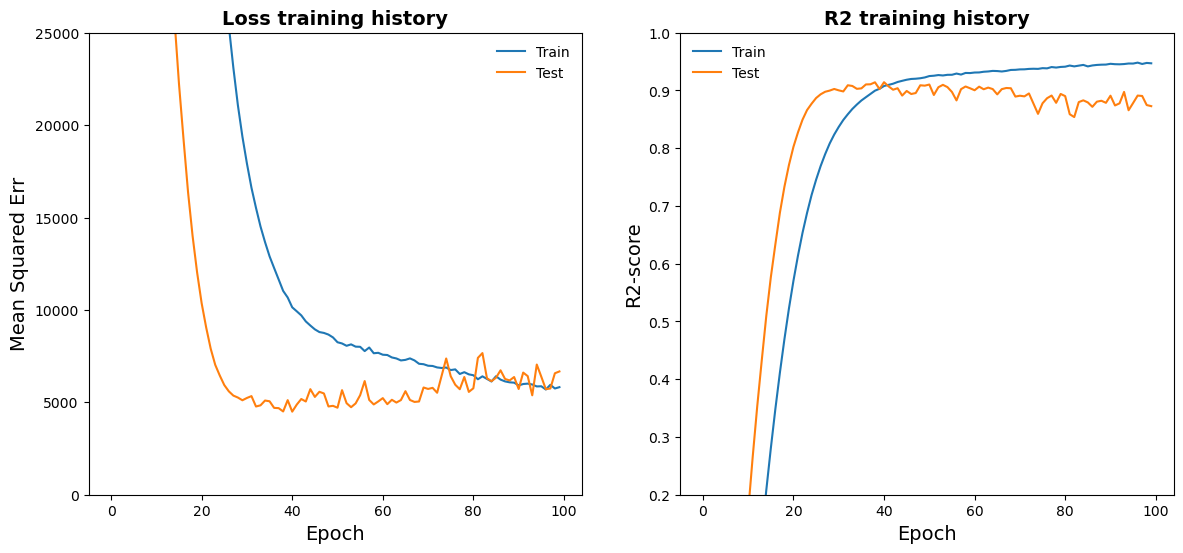

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Test')
ax1.legend(frameon=False)
ax1.set_ylim(0, 25000)
ax1.set_ylabel('Mean Squared Err', fontsize=14)

ax1.set_xlabel('Epoch', fontsize=14)

ax1.set_title('Loss training history', fontweight='bold', fontsize=14)
ax2.plot(history.history['r_square'], label='Train')
ax2.plot(history.history['val_r_square'], label='Test')
ax2.legend(frameon=False)
ax2.set_title('R2 training history',  fontweight='bold', fontsize=14)
ax2.set_ylim(0.2, 1)
ax2.set_ylabel('R2-score', fontsize=14)
ax2.set_xlabel('Epoch', fontsize=14)
#fig.savefig('RNN_first_martijn.png', dpi=300)
plt.show()

Following the exmample of https://pangkh98.medium.com/multi-step-multivariate-time-series-forecasting-using-lstm-92c6d22cd9c2

In [452]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'DHI',
       'DNI', 'Wind Speed', 'Wind Direction', 'Dew Point', 'Cloud Type',
       'Temperature', 'Solar Zenith Angle'],
      dtype='object')

In [474]:
features = ['Wind Speed', 'Wind Direction', 'Dew Point', 'Temperature', 'Solar Zenith Angle']

cloudtypes = to_categorical(df['Cloud Type'])

In [503]:
stacked_data = np.hstack([df[features].values, df[['GHI']].values])

# Scale
ss = StandardScaler()

stacked_sc = ss.fit_transform(stacked_data)
#a = 365*48*3
stacked_tot = np.hstack([stacked_sc[:,:-1], cloudtypes[:,:], stacked_sc[:,-1:]])


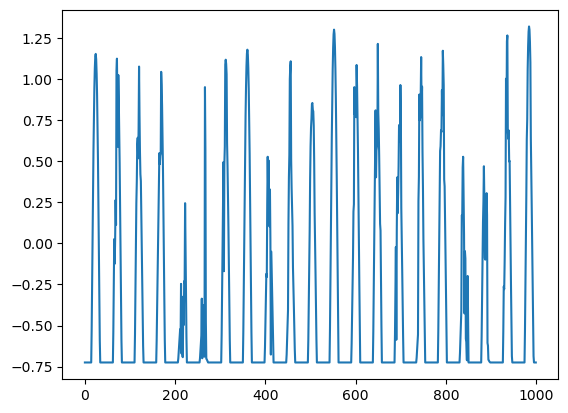

In [504]:
plt.plot(stacked_sc[:,-1:][:1000])

In [505]:
# split a multivariate sequence into samples
def split_sequences(data_in, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(data_in.shape[0]):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > data_in.shape[0]:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data_in[i:end_ix, :-1], data_in[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 192, 24
# covert into input/output
X, y = split_sequences(stacked_tot, n_steps_in, n_steps_out)

In [506]:
print(X.shape, y.shape)

nr_features = X.shape[2]

(87482, 192, 15) (87482, 24)


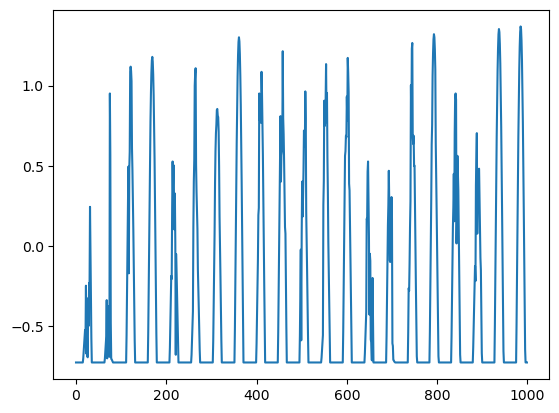

In [507]:
plt.plot(y[:1000,0])

In [513]:
split_point = 1200 * 48
a = 1
train_X , train_y = X[:split_point, :] , y[:split_point, :]
test_X , test_y = X[split_point:, :] , y[split_point:, :]

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((57600, 192, 15), (57600, 24), (29882, 192, 15), (29882, 24))

In [514]:
#optimizer learning rate
opt = Nadam(learning_rate=0.0005)
# define model
model = Sequential()
model.add(BatchNormalization())
model.add(GRU(32, activation='relu', return_sequences=True, input_shape=(n_steps_in, nr_features)))
#model.add(Dropout(0.1))
model.add(GRU(32, activation='relu', kernel_regularizer=l2(0.05)))
#model.add(BatchNormalization())
model.add(Dense(n_steps_out))
model.add(Activation('linear'))
model.compile(loss='mse' , optimizer=opt , metrics=[RSquare()])

In [517]:
# Fit network
history = model.fit(train_X , train_y , epochs=90, batch_size=200, verbose=1 ,validation_data=(test_X, test_y) ,shuffle=False)

Epoch 1/90
288/288 [==============================] - 44s 154ms/step - loss: 0.4608 - r_square: 0.7925 - val_loss: 0.6263 - val_r_square: 0.4880
Epoch 2/90
288/288 [==============================] - 42s 146ms/step - loss: 0.1875 - r_square: 0.8700 - val_loss: 0.4911 - val_r_square: 0.5577
Epoch 3/90
288/288 [==============================] - 41s 142ms/step - loss: 0.1428 - r_square: 0.8832 - val_loss: 0.4300 - val_r_square: 0.6027
Epoch 4/90
288/288 [==============================] - 41s 143ms/step - loss: 0.1299 - r_square: 0.8864 - val_loss: 0.3903 - val_r_square: 0.6352
Epoch 5/90
288/288 [==============================] - 42s 147ms/step - loss: 0.1253 - r_square: 0.8865 - val_loss: 0.3640 - val_r_square: 0.6575
Epoch 6/90
288/288 [==============================] - 42s 147ms/step - loss: 0.1242 - r_square: 0.8852 - val_loss: 0.3467 - val_r_square: 0.6725
Epoch 7/90
288/288 [==============================] - 43s 148ms/step - loss: 0.1248 - r_square: 0.8833 - val_loss: 0.3350 - val_r_

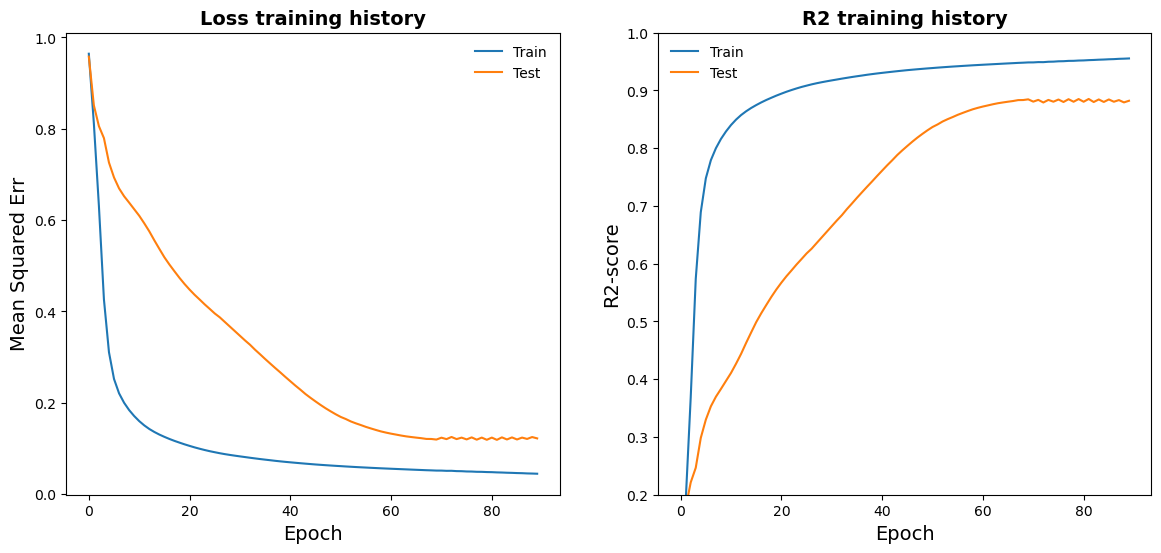

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Test')
ax1.legend(frameon=False)
#ax1.set_ylim(0, 25000)
ax1.set_ylabel('Mean Squared Err', fontsize=14)

ax1.set_xlabel('Epoch', fontsize=14)

ax1.set_title('Loss training history', fontweight='bold', fontsize=14)
ax2.plot(history.history['r_square'], label='Train')
ax2.plot(history.history['val_r_square'], label='Test')
ax2.legend(frameon=False)
ax2.set_title('R2 training history',  fontweight='bold', fontsize=14)
ax2.set_ylim(0.2, 1)
ax2.set_ylabel('R2-score', fontsize=14)
ax2.set_xlabel('Epoch', fontsize=14)
#fig.savefig('RNN_first_martijn.png', dpi=300)
plt.show()

In [194]:
preds_train = model.predict(train_X)

450/450 [==============================] - 8s 18ms/step


In [195]:
preds_test = model.predict(test_X)

93/93 [==============================] - 2s 18ms/step


In [153]:
preds_train.shape

(14400, 24)

In [157]:
train_y.shape

(14400, 24)

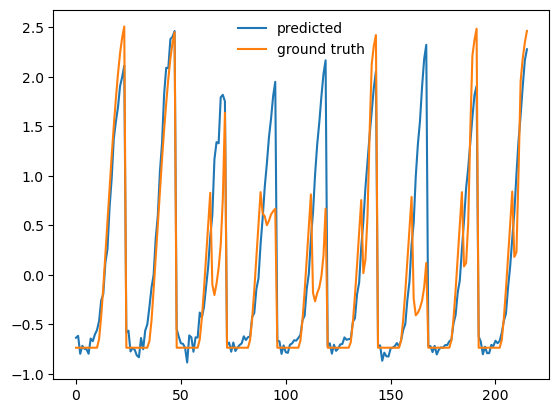

In [200]:
preds_l, test_l = [], []
for i in range(11, 20):
    preds_l += list(preds_test[i*48,:])
    test_l += list(test_y[i*48,:])
plt.plot(preds_l, label='predicted')
plt.plot(test_l, label='ground truth')
plt.legend(frameon=False)